In [1]:
print(f'Hello ch04!')

Hello ch04!


The note book is [here](https://github.com/ageron/handson-ml/blob/master/04_training_linear_models.ipynb)

In [2]:
%matplotlib notebook

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 4.1.1 Normal equation

In [4]:
X = 2 * np.random.rand(100, 1)
print(X.shape, X[:5])
y = 4 + 3 * X + np.random.rand(100, 1)

(100, 1) [[1.40926794]
 [1.90248473]
 [1.32965686]
 [1.84745364]
 [1.77950068]]


<IPython.core.display.Javascript object>


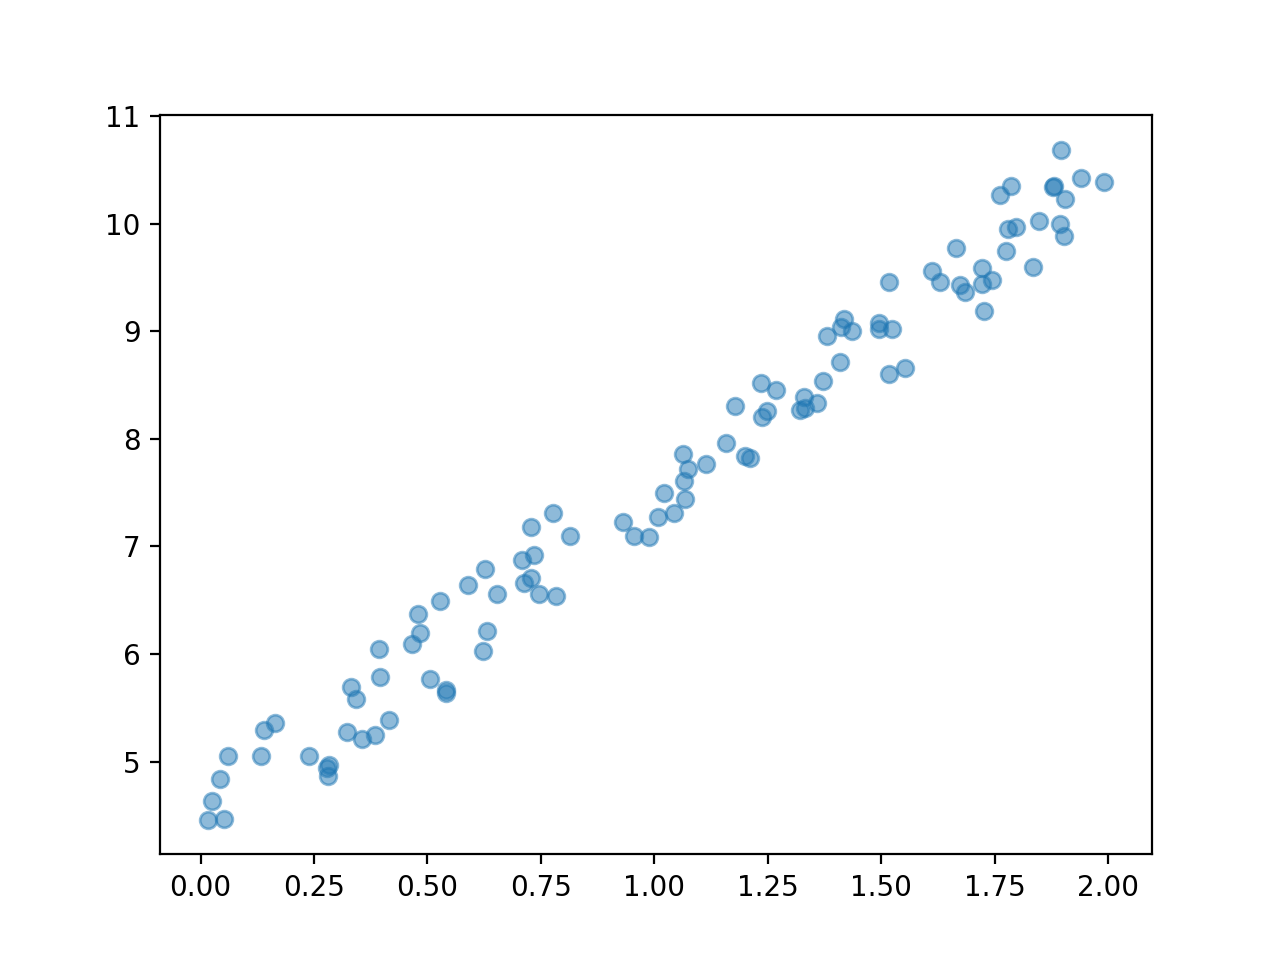

In [5]:
fig = plt.figure()
plt.scatter(X, y, alpha=0.5)

In [6]:
X.shape

(100, 1)

In [7]:
X_b = np.c_[np.ones((100, 1)), X]

In [8]:
X_b.shape

(100, 2)

In [10]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

[[4.49587418]
 [2.99902473]]


In [11]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
X_new_b

array([[1., 0.],
       [1., 2.]])

In [12]:
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.49587418],
       [10.49392365]])

<IPython.core.display.Javascript object>


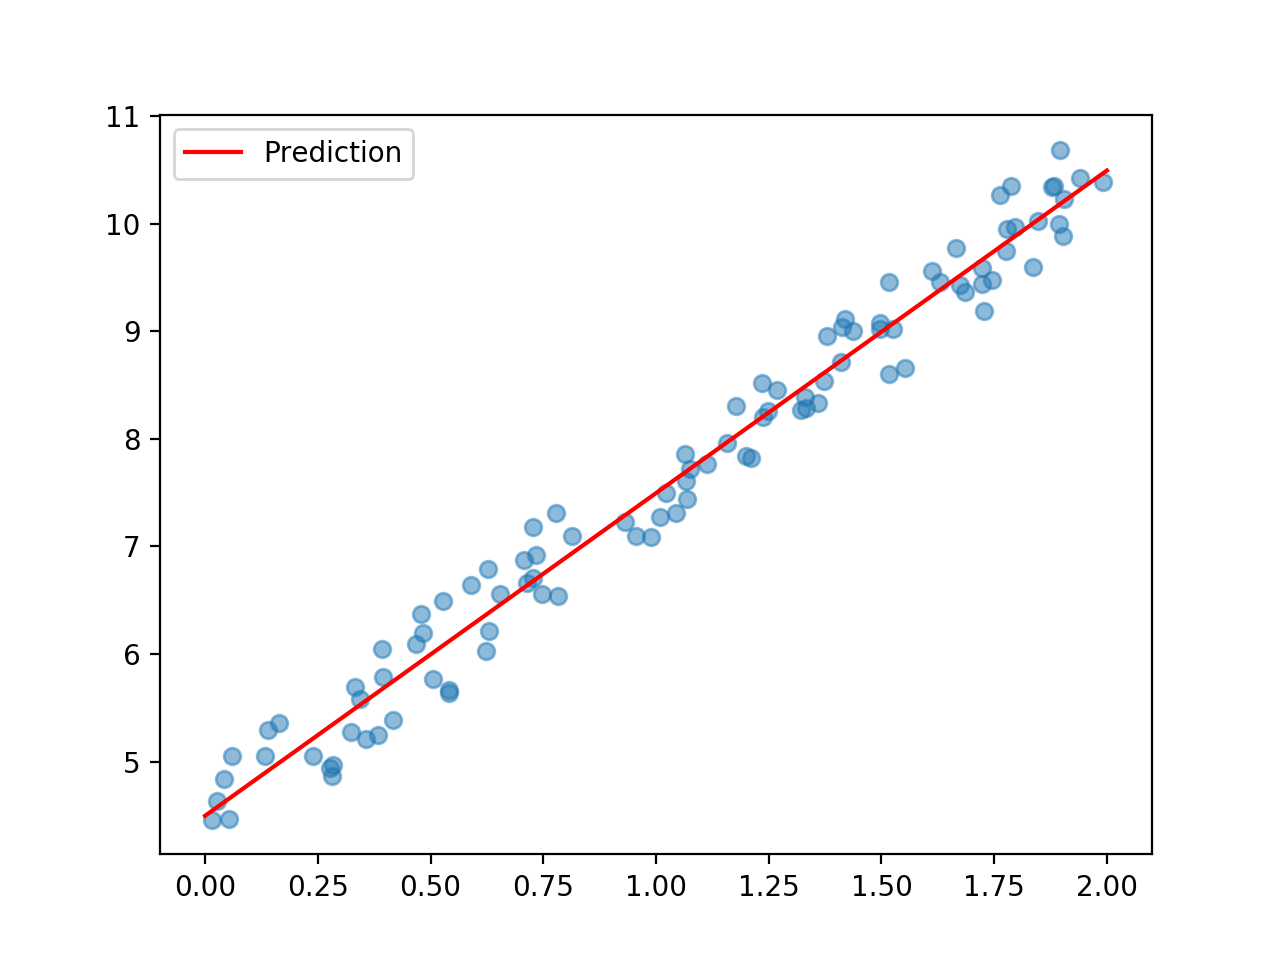

In [13]:
fig = plt.figure()
plt.scatter(X, y, alpha=0.5)
plt.plot(X_new, y_predict, 'r', label='Prediction')
plt.legend()

#### Use `sklearn` to perform linear regression

In [14]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)

[4.49587418] [[2.99902473]]


In [15]:
theta_best_svd, residules, rank, s = np.linalg.lstsq(X_b, y, rcond=None)
print(theta_best_svd)

[[4.49587418]
 [2.99902473]]


In [16]:
np.linalg.pinv(X_b).dot(y)

array([[4.49587418],
       [2.99902473]])

### 4.2.1 Batch Gradient

In [17]:
eta = 0.1
n_iterations = 1000
m = 100

In [18]:
init_theta = np.random.randn(2, 1)
print(f'Initial gradient: {init_theta}')

Initial gradient: [[-0.00597032]
 [ 1.45713076]]


<IPython.core.display.Javascript object>


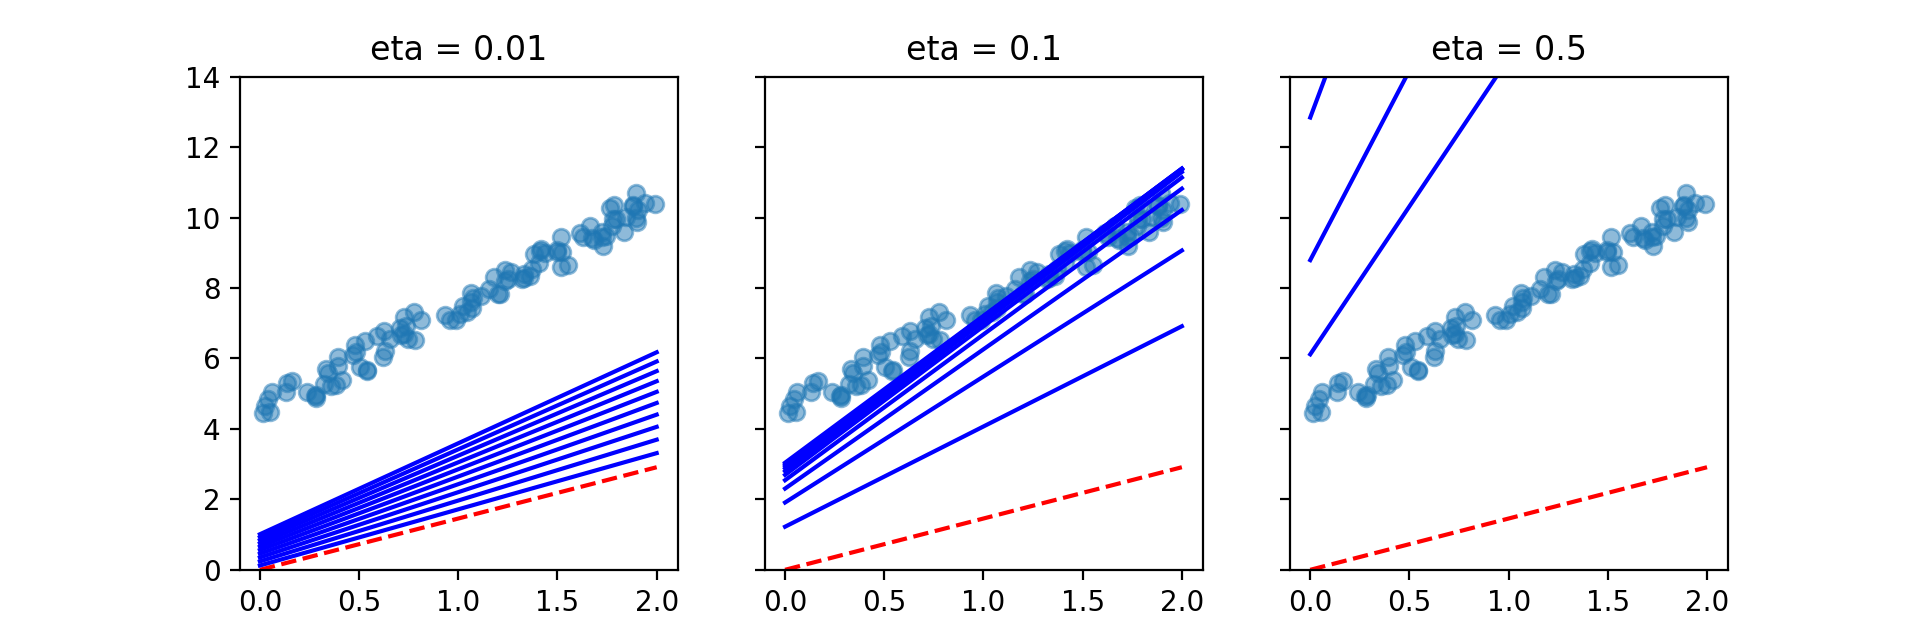

final gradient: [[4.39291392]
 [3.08260963]]
final gradient: [[4.49587418]
 [2.99902473]]
final gradient: [[-2.50766509e+112]
 [-3.08895354e+112]]


In [19]:
fig, ax = plt.subplots(1, 3, sharey=True, figsize=(9.6, 3.2))
plt.ylim([0, 14])

for ix, eta in enumerate([0.01, 0.1, 0.5]):
    ax[ix].scatter(X, y, alpha=0.5)
    ax[ix].plot(X_new, X_new_b.dot(init_theta), 'r--')

    theta = init_theta

    for iter in range(n_iterations):
        gradient = 2. / m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradient
        if iter < 10:
            ax[ix].plot(X_new, X_new_b.dot(theta), 'b')
    ax[ix].set_title(f'eta = {eta}')

    print(f'final gradient: {theta}')

### 4.2.2 Stochastic Gradient Descent

In [20]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

In [21]:
init_theta = np.random.randn(2, 1)

In [22]:
from sklearn.metrics import mean_squared_error

<IPython.core.display.Javascript object>


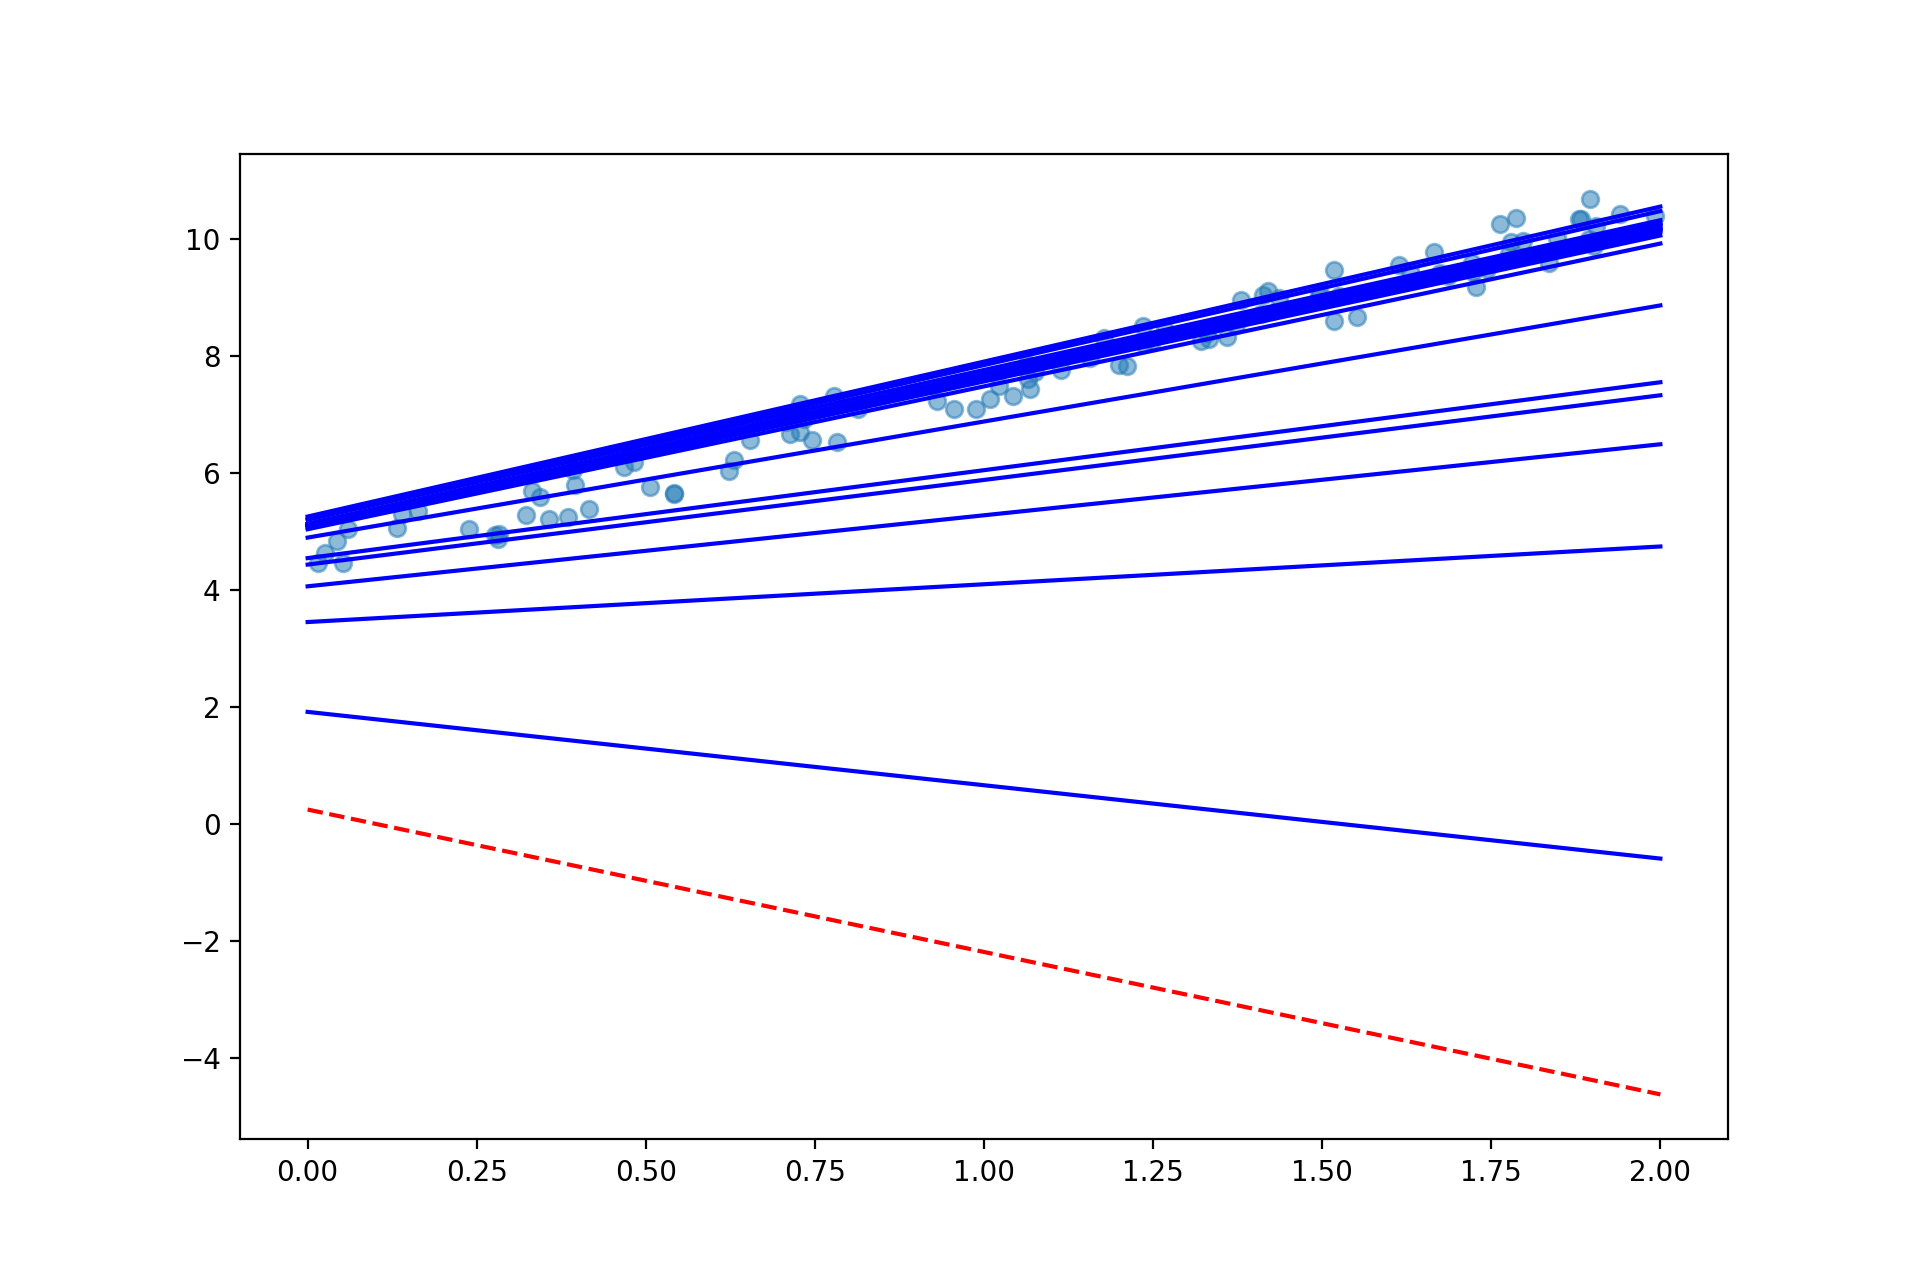

final gradient: [[4.50508539]
 [3.00125452]]


In [23]:
theta = init_theta

fig, ax = plt.subplots(1, 1, figsize=(9.6, 6.4))
ax.scatter(X, y, alpha=0.5)
ax.plot(X_new, X_new_b.dot(init_theta), 'r--')

cost = []

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(100)
        xi = X_b[random_index]
        yi = y[random_index]
        gradients = 2 * (xi.dot(theta) - yi) * xi
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients.reshape(2,1)
        
        if epoch == 0 and i < 20:
            ax.plot(X_new, X_new_b.dot(theta), 'b')
        
        y_predict = X_b.dot(theta)
        cost.append(mean_squared_error(y, y_predict))

print(f'final gradient: {theta}')

#### Plot the cost funtion, should be bumpy

<IPython.core.display.Javascript object>


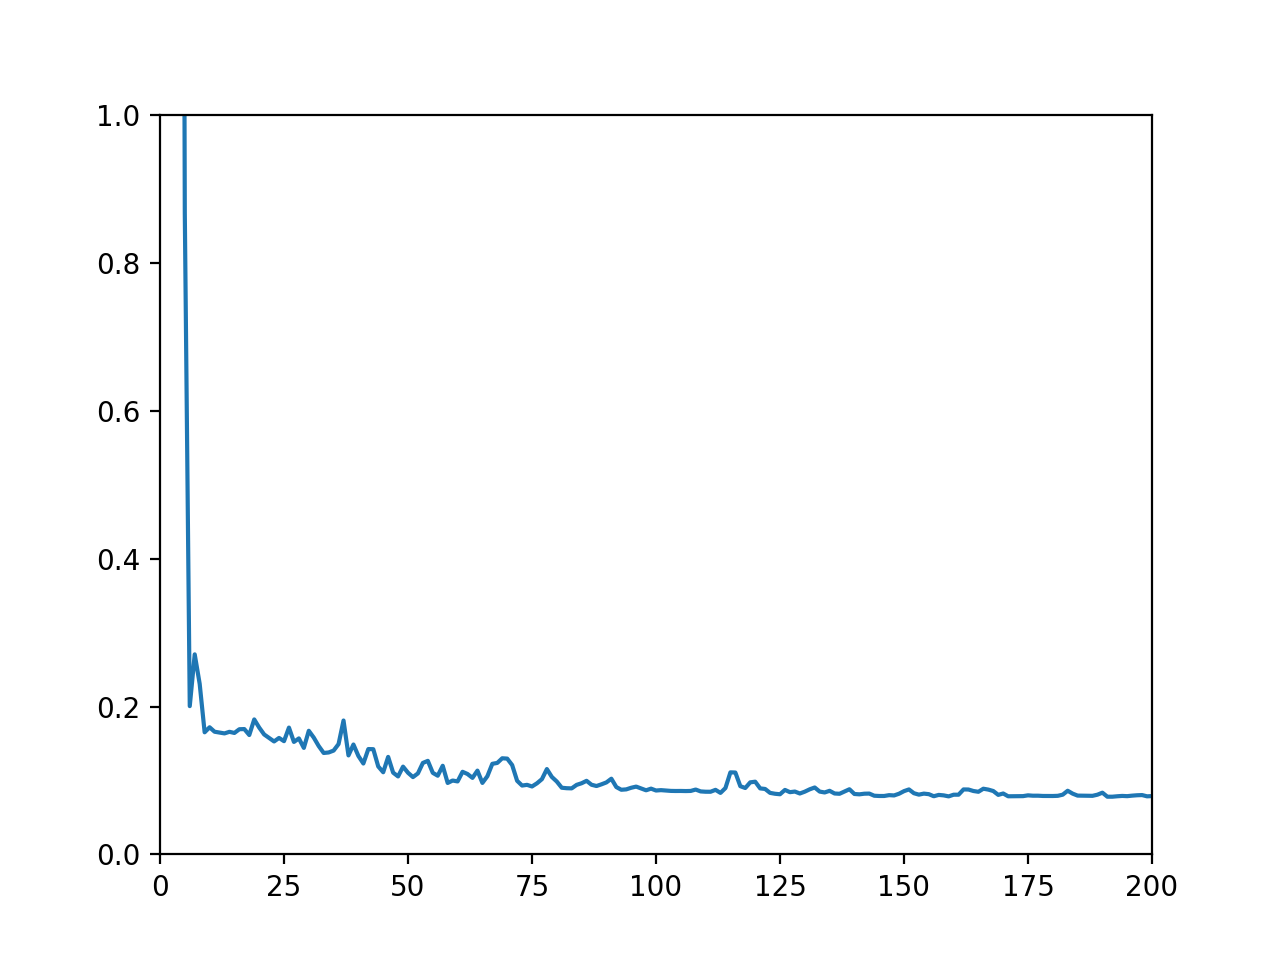

(0, 1.0)

In [24]:
fig = plt.figure()
plt.plot(cost)
plt.xlim([0,200])
plt.ylim([0,1.0])

#### Use sklearn

In [25]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)

In [26]:
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [27]:
sgd_reg.coef_, sgd_reg.intercept_

(array([3.03183676]), array([4.48485708]))

## 4.3 Polynomial Regression

In [28]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.rand(m, 1)

<IPython.core.display.Javascript object>


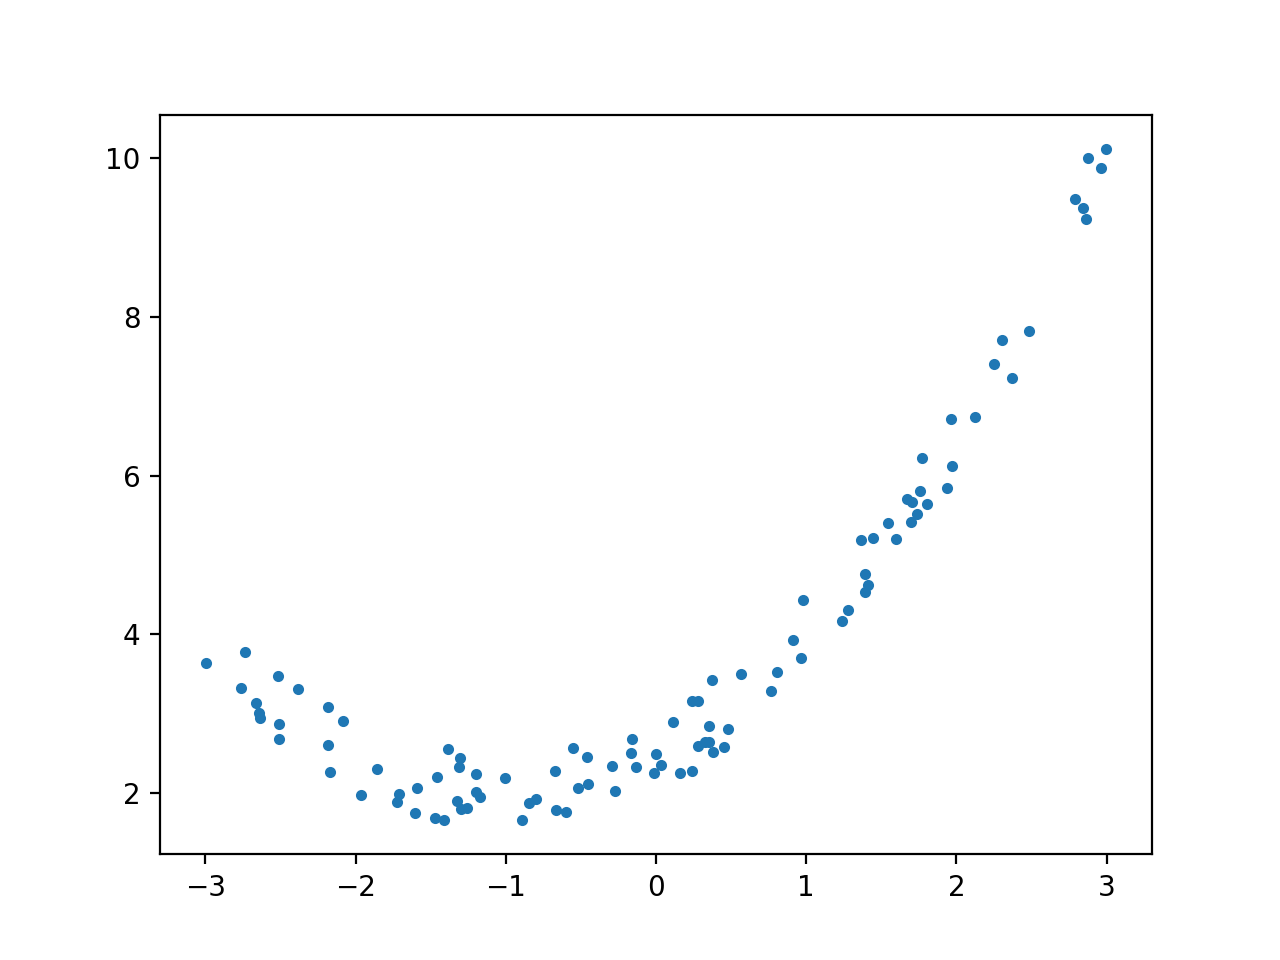

In [29]:
fig = plt.figure()
plt.rc('lines', markersize=3)
plt.scatter(X, y)

In [30]:
from sklearn.preprocessing import PolynomialFeatures

In [31]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [32]:
print(X[0], X_poly[0])

[-0.46161657] [-0.46161657  0.21308986]


In [33]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
lin_reg.intercept_, lin_reg.coef_

(array([2.44977102]), array([[1.01882317, 0.49816485]]))

In [35]:
X_new = np.arange(-3., 3., 0.1).reshape(-1,1)

In [36]:
y_pred = lin_reg.predict(poly_features.fit_transform(X_new))

<IPython.core.display.Javascript object>


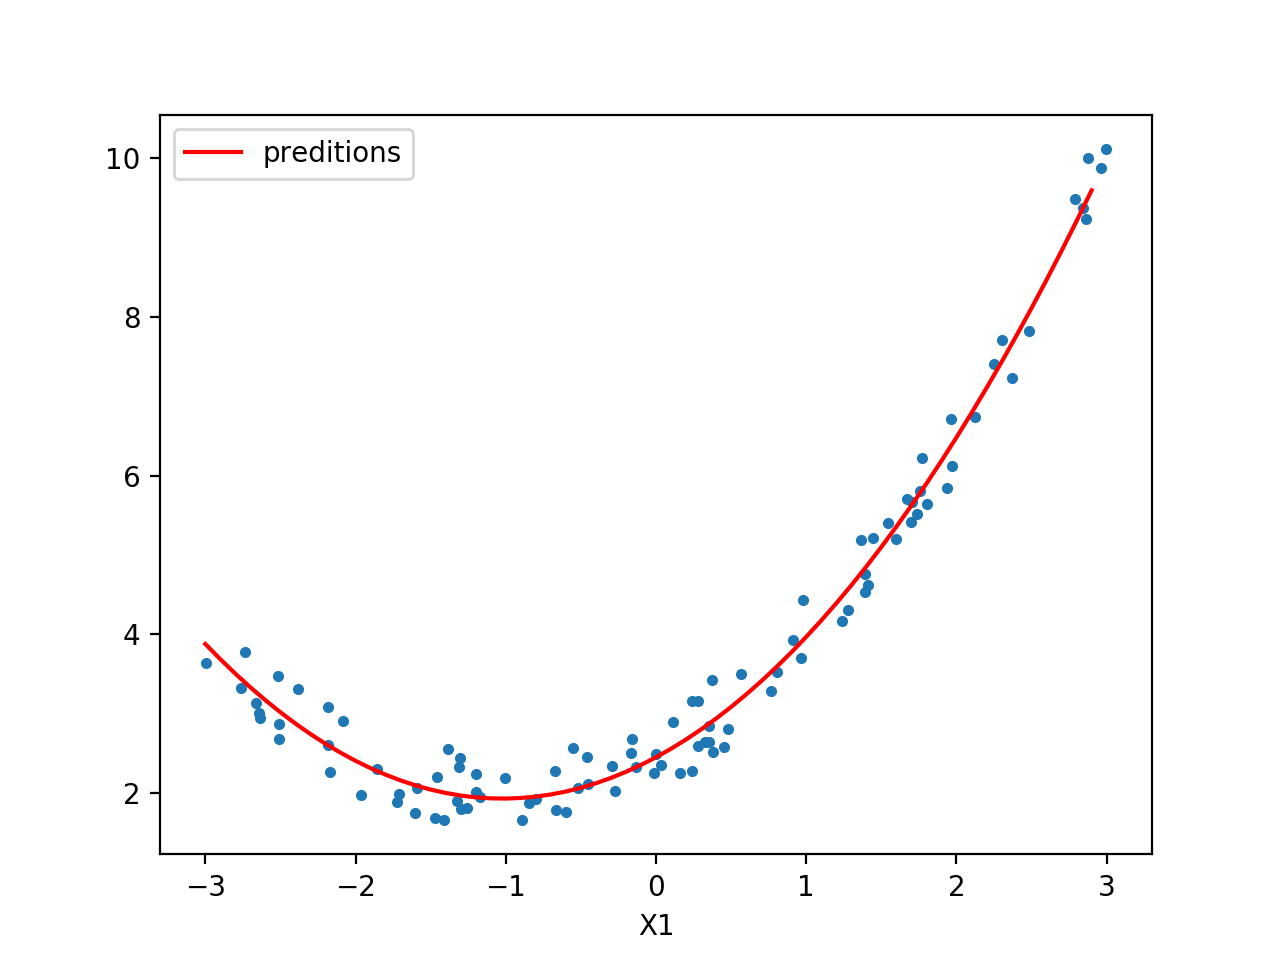

In [37]:
fig = plt.figure()
plt.rc('lines', markersize=3)
plt.scatter(X, y)
plt.plot(X_new, y_pred, 'r', label='preditions')
plt.xlabel('X1')
plt.legend()

## 4.4 Learning curve

<IPython.core.display.Javascript object>


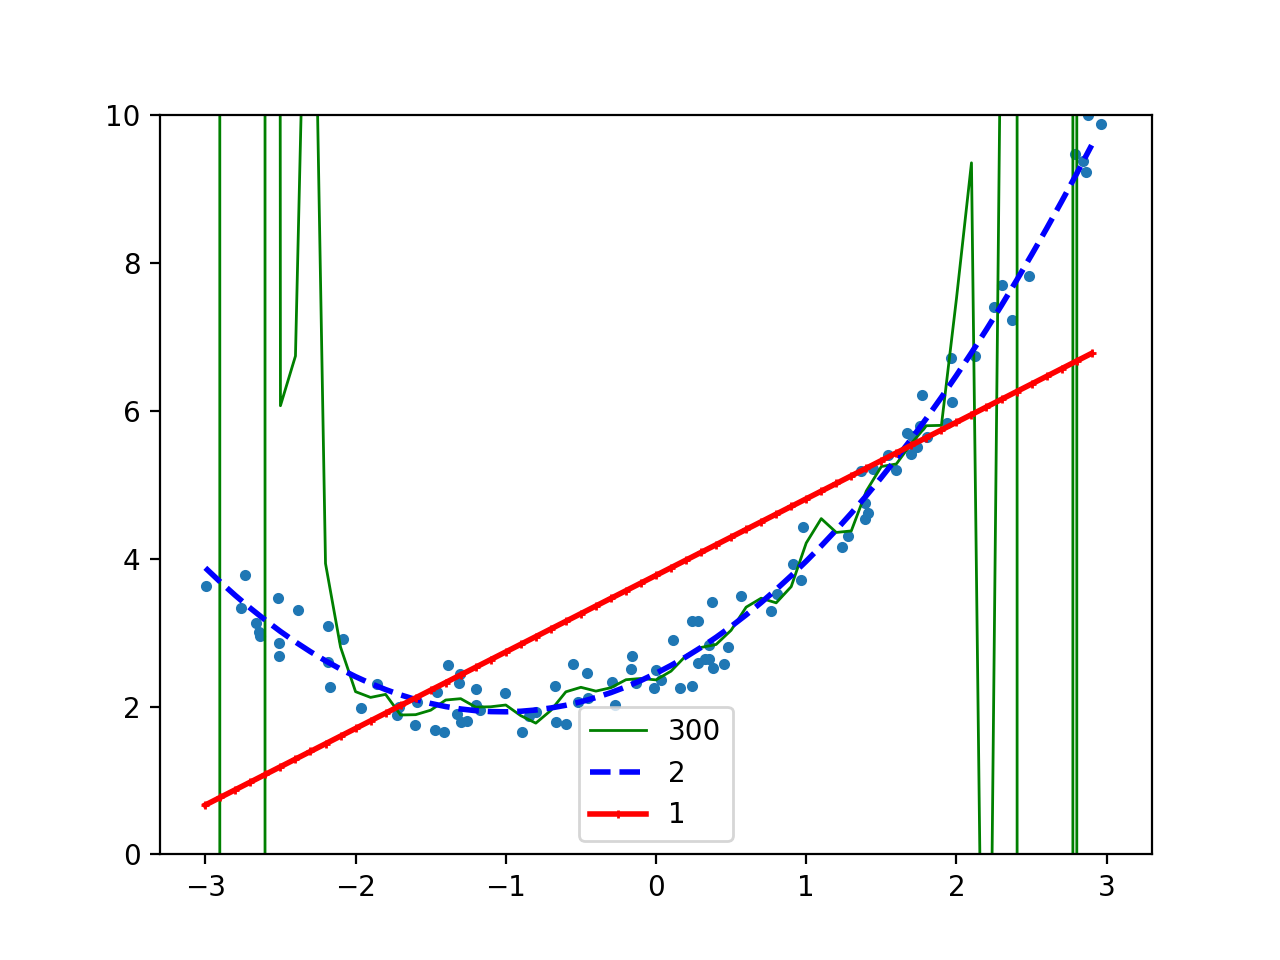

300
2
1


In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

fig = plt.figure()
plt.scatter(X, y)

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    print(degree)
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_pipeline = Pipeline([
        ("poly_features", polybig_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])
    polynomial_pipeline.fit(X, y)
    y_newbig = polynomial_pipeline.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.ylim([0, 10])
plt.legend()


## 4.4 Learning curve

In [39]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

<IPython.core.display.Javascript object>


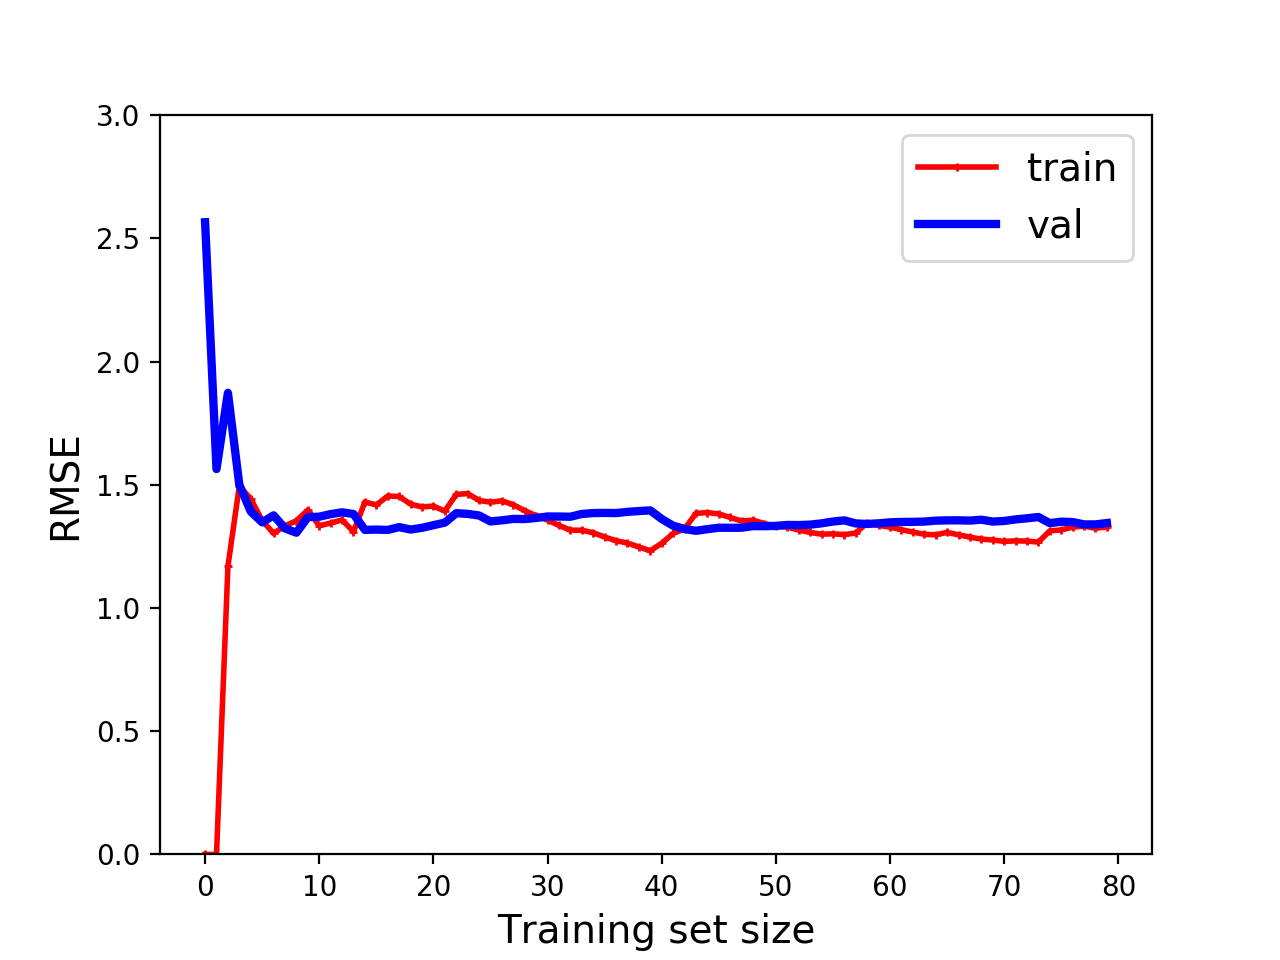

In [40]:
def plot_learning_curve(model, X, y):
    X_trn, X_val, y_trn, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    
    trn_err_list, val_err_list = [], []
    for m in range(1, len(X_trn)+1):
        model.fit(X_trn[:m], y_trn[:m])
        trn_err = mean_squared_error(model.predict(X_trn[:m]), y_trn[:m])
        val_err = mean_squared_error(model.predict(X_val), y_val)
        trn_err_list.append(trn_err)
        val_err_list.append(val_err)
    
    fig = plt.figure()
    plt.plot(np.sqrt(trn_err_list), 'r-+', linewidth=2, label='train')
    plt.plot(np.sqrt(val_err_list), 'b-', linewidth=3, label='val')
    plt.legend(loc='best', fontsize=14)
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown
    plt.ylim([0, 3.0])

lin_reg = LinearRegression()
plot_learning_curve(lin_reg, X, y)

In [41]:
polynomial_regressions = Pipeline([
    ('poly_features', PolynomialFeatures(degree=15, include_bias=False)),
    ('lin_reg', LinearRegression()),
]
)

<IPython.core.display.Javascript object>


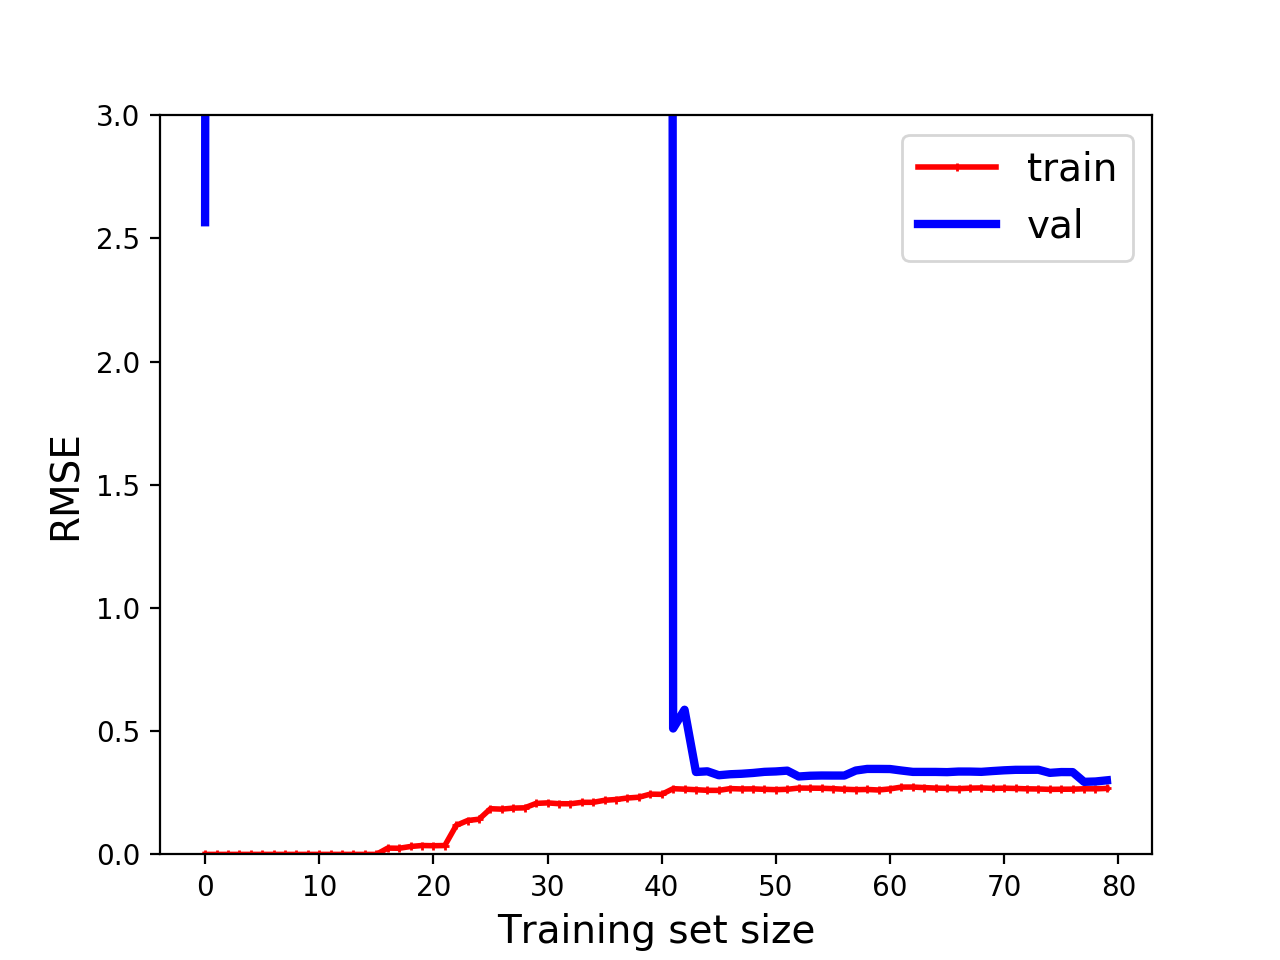

In [42]:
plot_learning_curve(polynomial_regressions, X, y)

In [43]:
from sklearn.linear_model import Ridge

<IPython.core.display.Javascript object>


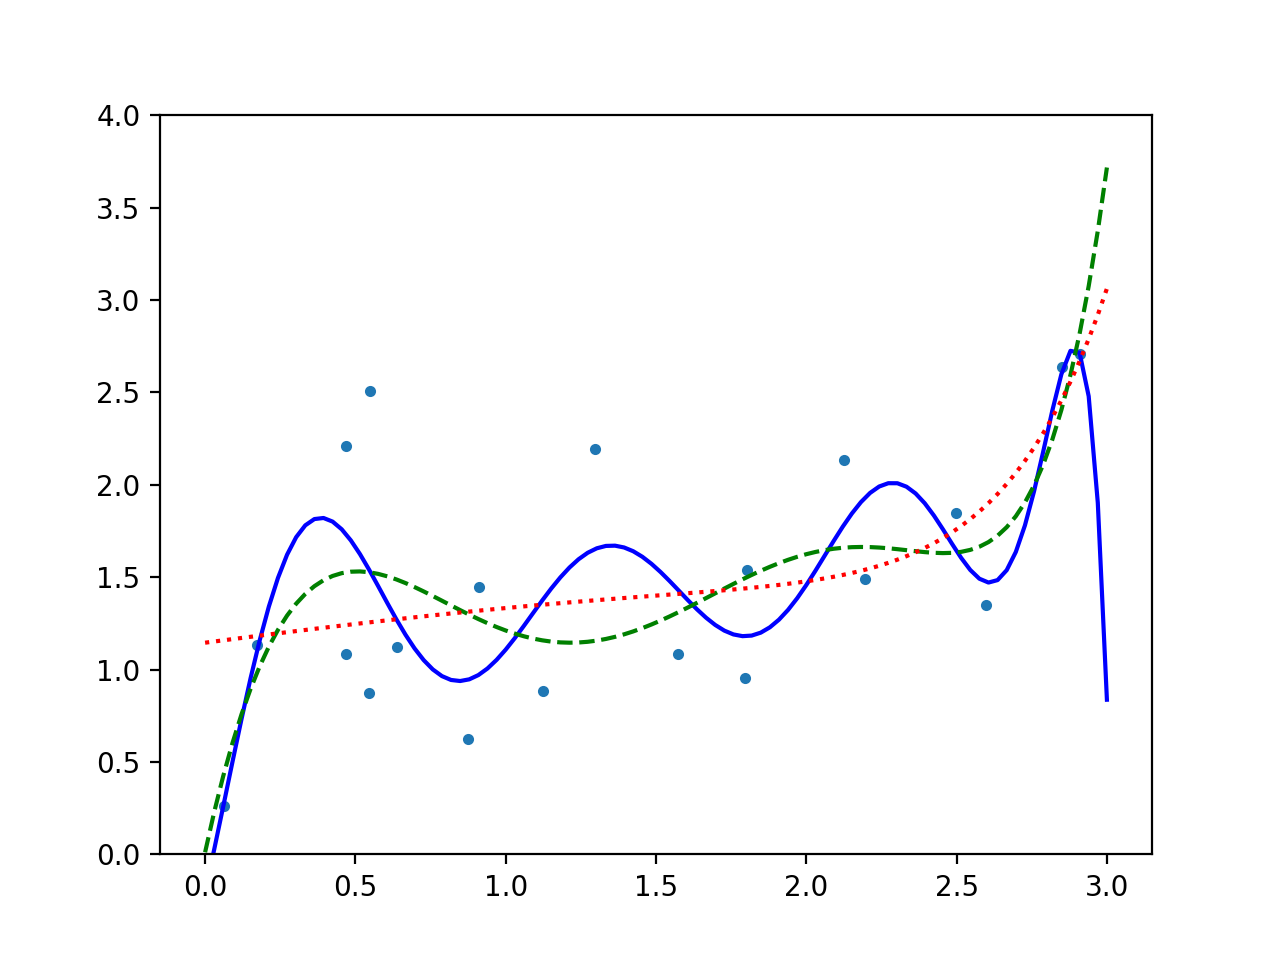

In [44]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

fig = plt.figure()
plt.scatter(X, y)
plt.ylim([0, 4])

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ('b-', 'g--', 'r:')):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
                ('std_scaler', StandardScaler()),
                ('model', model)
            ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        plt.plot(X_new, y_new_regul, style)

# plot_model(Ridge, False, [0, 10, 100], random_state=42)
plot_model(Ridge, True, alphas=(0, 10**-5, 1), random_state=42)

In [69]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver='cholesky', random_state=42)
ridge_reg.fit(X, y)
print(ridge_reg.predict([[1.5]]))
print(ridge_reg.coef_, ridge_reg.intercept_)

[[1.55071465]]
[[0.36280369]] [1.00650911]


In [73]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(alpha=0.001, max_iter=5000, tol=-np.infty, penalty='l2', random_state=42)
sgd_reg.fit(X, y.ravel())
print(sgd_reg.coef_, sgd_reg.intercept_)
print(sgd_reg.predict([[1.5]]))

[0.38484138] [0.97644073]
[1.5537028]


In [70]:
ridge_reg = Ridge(alpha=1, solver='sag', random_state=42)
ridge_reg.fit(X, y)
print(ridge_reg.predict([[1.5]]))
print(ridge_reg.coef_, ridge_reg.intercept_)

[[1.5507201]]
[[0.3628467]] [1.00645006]
